### 캔들차트
<img src="img/candle.jpg"/>
<img src="img/candle2.png"/>

In [1]:
### 캔들 차트 그리기
import sqlite3
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [53]:
def seldata(cols=['sday','sopen','shigh','slow','sclose','svol'],where='where sday>"2022-04-01" order by sday asc'):
    fname='_db/nstock.db'
    with sqlite3.connect(fname) as conn:
        cur=conn.cursor()
        coltxt=','.join(cols)
        sql='select '+coltxt+' from stockdb '+where
        print(sql)
        res=cur.execute(sql).fetchall()
    return res

res=seldata()    
res[:5]

select sday,sopen,shigh,slow,sclose,svol from stockdb where sday>"2022-04-01" order by sday asc


[('2022-04-04', 115000, 117500, 114500, 117000, 2470792),
 ('2022-04-05', 117500, 118000, 116000, 116500, 2101474),
 ('2022-04-06', 114500, 115500, 113000, 113000, 4541938),
 ('2022-04-07', 111500, 114500, 110500, 113500, 5027865),
 ('2022-04-08', 113000, 114000, 110500, 112000, 4268316)]

In [55]:
cols=['sday','sopen','shigh','slow','sclose','svol']
df = pd.DataFrame(res,columns=cols)
df.tail()

,sday,sopen,shigh,slow,sclose,svol
23,2022-05-06,108000,108500,106500,107500,2566813
24,2022-05-09,107000,109000,106500,107500,2203472
25,2022-05-10,107000,111000,107000,110000,4141923
26,2022-05-11,110500,112500,108000,110500,3658168
27,2022-05-12,109500,111500,108500,110500,1938788


# mpl_finance 캔들 차트를 그리기 위한 라이브러리

In [6]:
from mpl_finance import candlestick_ohlc

In [56]:
cdf=df.set_index('sday')
cdf.tail()

,sopen,shigh,slow,sclose,svol
sday,,,,,
2022-05-06,108000,108500,106500,107500,2566813
2022-05-09,107000,109000,106500,107500,2203472
2022-05-10,107000,111000,107000,110000,4141923
2022-05-11,110500,112500,108000,110500,3658168
2022-05-12,109500,111500,108500,110500,1938788


In [57]:
idx=np.arange(len(cdf))

In [58]:
idxs=np.reshape(idx,(-1,1))
idxs.shape

(28, 1)

In [64]:
cdf['svol'].values

array([2470792, 2101474, 4541938, 5027865, 4268316, 2390786, 2738163,
       2484490, 4715700, 3694012, 2670439, 3021192, 2905007, 3199858,
       2360834, 2282343, 2969516, 3261290, 2804966, 3752415, 2175384,
       2676115, 2491890, 2566813, 2203472, 4141923, 3658168, 1938788],
      dtype=int64)

In [61]:
# 캔들 스틱용 자료 만들기
ohlc=cdf[['sopen','shigh','slow','sclose']].values
candleohlc=np.hstack((idxs,ohlc))
candleohlc[:5]

array([[     0, 115000, 117500, 114500, 117000],
       [     1, 117500, 118000, 116000, 116500],
       [     2, 114500, 115500, 113000, 113000],
       [     3, 111500, 114500, 110500, 113500],
       [     4, 113000, 114000, 110500, 112000]], dtype=int64)

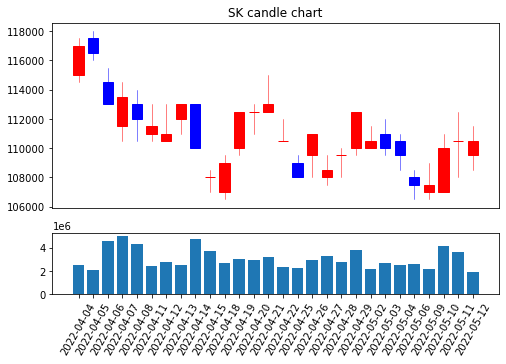

In [77]:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(8,5))
gs= GridSpec(nrows=2,
             ncols=1,
             height_ratios=[3,1])
ax1=fig.add_subplot(gs[0,0])
ax1.get_xaxis().set_visible(False)
ax2=fig.add_subplot(gs[1,0],sharex=ax1)
candlestick_ohlc(ax1,candleohlc,
                 colordown='b',
                 colorup='r',
                 width=0.7
                )
ax2.bar(cdf.index,cdf['svol'].values)
plt.xticks(rotation=60)
ax1.set_title('SK candle chart')
plt.show()